In [ ]:
from google.colab import drive

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as stats
import statsmodels.api as sm

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.model_selection import GridSearchCV, TimeSeriesSplit, cross_val_score
from sklearn.utils.class_weight import compute_sample_weight

from sklearn.feature_selection import RFE
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    accuracy_score,
    recall_score,
    f1_score,
    roc_auc_score,
    roc_curve
)

In [ ]:
# Mount Google Drive
drive.mount('/content/drive')

# Replace 'path/to/your/file.csv' with the actual path to your CSV file in Google Drive
file_path = "/content/drive/MyDrive/STAT_430/STAT_430_Projects/Project_2/Solution/african_crises.csv"

Mounted at /content/drive


# 1. EDA

In [ ]:
df = pd.read_csv(file_path)

In [ ]:
# Convert date column to DateTime format
df['year'] = pd.to_datetime(df['year'], format = '%Y')

In [ ]:
# Encode 'banking_crisis' as binary: 1 = crisis, 0 = no crisis
df['banking_crisis'] = df['banking_crisis'].map({'crisis': 1, 'no_crisis': 0})

In [ ]:
df['country'].value_counts()

,count
country,
Egypt,155
South Africa,114
Zimbabwe,90
Algeria,85
Angola,77
Morocco,75
Tunisia,75
Zambia,72
Mauritius,68


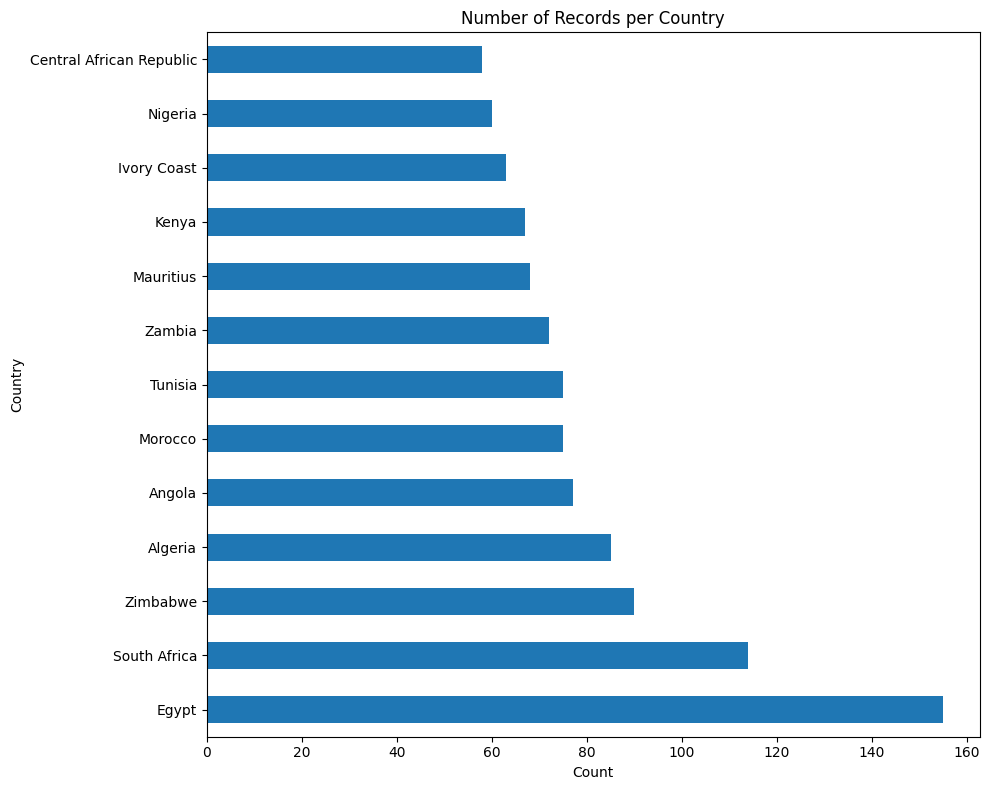

In [ ]:
# Get value counts
country_counts = df['country'].value_counts()

# Plot horizontal bar chart
plt.figure(figsize=(10, 8))
country_counts.plot(kind='barh')
plt.xlabel('Count')
plt.ylabel('Country')
plt.title('Number of Records per Country')
plt.tight_layout()
plt.show()

In [ ]:
len(df['country'].value_counts())

13

In [ ]:
df

,case,cc3,country,year,systemic_crisis,exch_usd,domestic_debt_in_default,sovereign_external_debt_default,gdp_weighted_default,inflation_annual_cpi,independence,currency_crises,inflation_crises,banking_crisis
0,1,DZA,Algeria,1870-01-01,1,0.052264,0,0,0.0,3.441456,0,0,0,1
1,1,DZA,Algeria,1871-01-01,0,0.052798,0,0,0.0,14.149140,0,0,0,0
2,1,DZA,Algeria,1872-01-01,0,0.052274,0,0,0.0,-3.718593,0,0,0,0
3,1,DZA,Algeria,1873-01-01,0,0.051680,0,0,0.0,11.203897,0,0,0,0
4,1,DZA,Algeria,1874-01-01,0,0.051308,0,0,0.0,-3.848561,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1054,70,ZWE,Zimbabwe,2009-01-01,1,354.800000,1,1,0.0,-7.670000,1,1,0,1
1055,70,ZWE,Zimbabwe,2010-01-01,0,378.200000,1,1,0.0,3.217000,1,0,0,0
1056,70,ZWE,Zimbabwe,2011-01-01,0,361.900000,1,1,0.0,4.920000,1,0,0,0
1057,70,ZWE,Zimbabwe,2012-01-01,0,361.900000,1,1,0.0,3.720000,1,0,0,0


In [ ]:
df.shape

(1059, 14)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1059 entries, 0 to 1058
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   case                             1059 non-null   int64         
 1   cc3                              1059 non-null   object        
 2   country                          1059 non-null   object        
 3   year                             1059 non-null   datetime64[ns]
 4   systemic_crisis                  1059 non-null   int64         
 5   exch_usd                         1059 non-null   float64       
 6   domestic_debt_in_default         1059 non-null   int64         
 7   sovereign_external_debt_default  1059 non-null   int64         
 8   gdp_weighted_default             1059 non-null   float64       
 9   inflation_annual_cpi             1059 non-null   float64       
 10  independence                     1059 non-null   int64      

In [ ]:
df.isnull().sum()

,0
case,0
cc3,0
country,0
year,0
systemic_crisis,0
exch_usd,0
domestic_debt_in_default,0
sovereign_external_debt_default,0
gdp_weighted_default,0
inflation_annual_cpi,0


In [ ]:
df.describe()

,case,year,systemic_crisis,exch_usd,domestic_debt_in_default,sovereign_external_debt_default,gdp_weighted_default,inflation_annual_cpi,independence,currency_crises,inflation_crises,banking_crisis
count,1059.000000,1059,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1.059000e+03,1059.000000,1059.000000,1059.000000,1059.000000
mean,35.613787,1967-10-08 14:01:41.983002832,0.077432,43.140831,0.039660,0.152975,0.006402,2.084889e+04,0.776204,0.132200,0.129367,0.088763
min,1.000000,1860-01-01 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,-2.850214e+01,0.000000,0.000000,0.000000,0.000000
25%,15.000000,1951-01-01 00:00:00,0.000000,0.195350,0.000000,0.000000,0.000000,2.086162e+00,1.000000,0.000000,0.000000,0.000000
50%,38.000000,1973-01-01 00:00:00,0.000000,0.868400,0.000000,0.000000,0.000000,5.762330e+00,1.000000,0.000000,0.000000,0.000000
75%,56.000000,1994-01-01 00:00:00,0.000000,8.462750,0.000000,0.000000,0.000000,1.164405e+01,1.000000,0.000000,0.000000,0.000000
max,70.000000,2014-01-01 00:00:00,1.000000,744.306139,1.000000,1.000000,0.400000,2.198970e+07,1.000000,2.000000,1.000000,1.000000
std,23.692402,NaN,0.267401,111.475380,0.195251,0.360133,0.043572,6.757274e+05,0.416984,0.349847,0.335765,0.284536


Correlation between variables

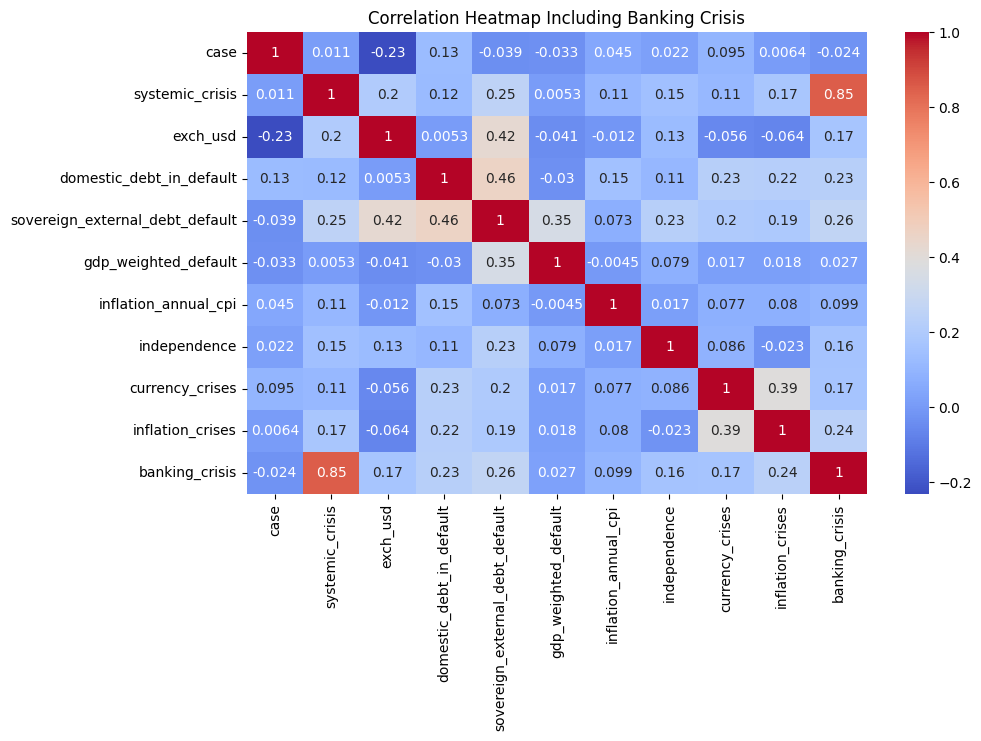

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap Including Banking Crisis')
plt.show()

"inflation_annual_cpi" vs "inflation_crises"

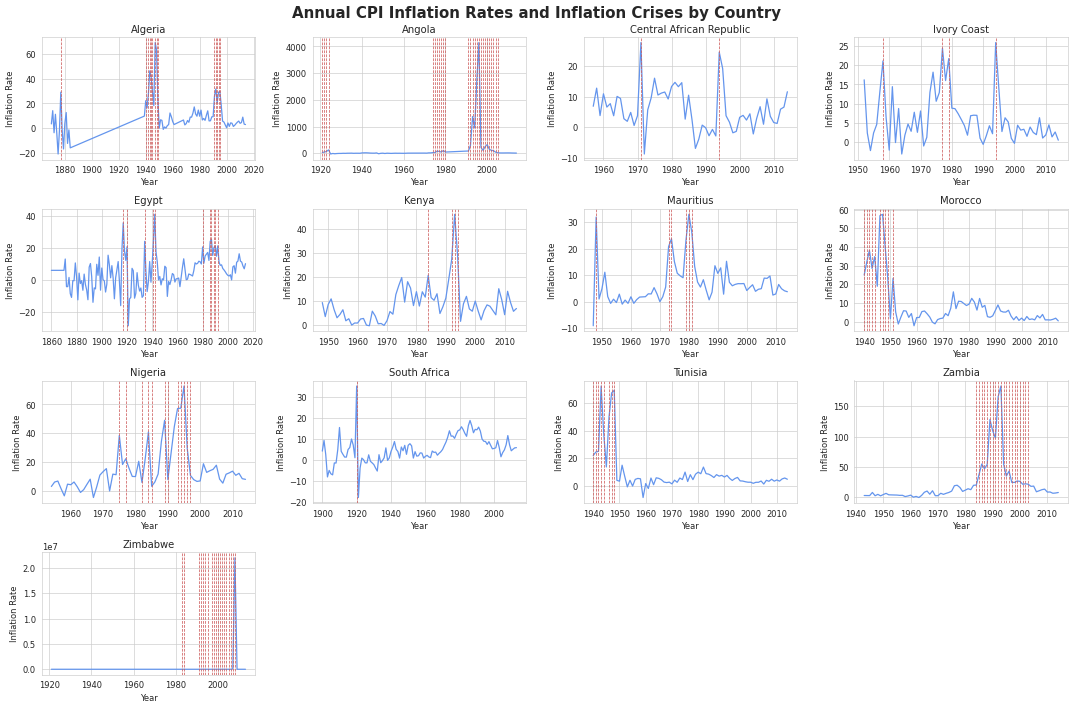

In [ ]:
sns.set_style('whitegrid')
fig, axes = plt.subplots(ncols=4, nrows=4, figsize=(18,12), dpi= 60)
axes = axes.flatten()

for i, ax in zip(df['country'].unique(), axes):
  sns.lineplot(x = 'year', y = 'inflation_annual_cpi', data = df[df['country'] == i], ax = ax, color = 'cornflowerblue')
  ax.set_xlabel('Year')
  ax.set_ylabel('Inflation Rate')
  ax.set_title('{}'.format(i))
  inflation = df[(df['country'] == i) & (df['inflation_crises'] == 1)]['year'].unique()

  for i in inflation:
    ax.axvline(x=i, color='indianred', linestyle='--', linewidth=.9)

fig.subplots_adjust(top=0.95)
fig.suptitle("Annual CPI Inflation Rates and Inflation Crises by Country", fontsize=18, fontweight='bold')

for i in range(13,16):
  fig.delaxes(axes[i])

plt.tight_layout()

"exch_usd" vs "currency_crisis"

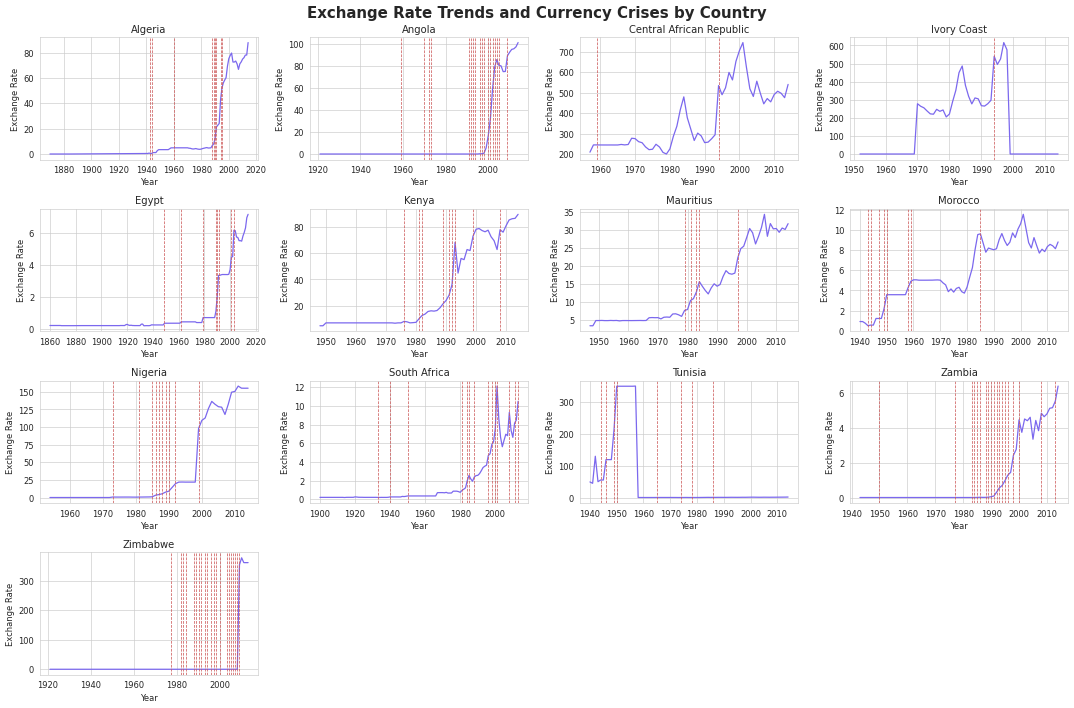

In [ ]:
# Let's have a look at exchange rate and currency crisis
sns.set_style('whitegrid')
fig, axes = plt.subplots(ncols=4, nrows=4, figsize=(18,12), dpi= 60)
axes = axes.flatten()

for i, ax in zip(df['country'].unique(), axes):
  sns.lineplot(x = 'year', y = 'exch_usd', data = df[df['country'] == i], ax = ax, color = 'mediumslateblue')
  ax.set_xlabel('Year')
  ax.set_ylabel('Exchange Rate')
  ax.set_title('{}'.format(i))
  currency = df[(df['country'] == i) & (df['currency_crises'] == 1)]['year'].unique()

  for i in currency:
    ax.axvline(x=i, color='indianred', linestyle='--', linewidth=.9)

fig.subplots_adjust(top=0.95)
fig.suptitle("Exchange Rate Trends and Currency Crises by Country", fontsize=18, fontweight='bold')

for i in range(13,16):
  fig.delaxes(axes[i])

plt.tight_layout()
display()

Explore "banking_crisis"

In [ ]:
df['banking_crisis'].value_counts().sort_index()

,count
banking_crisis,
0,965
1,94


<ipython-input-18-28cb27bb7212>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


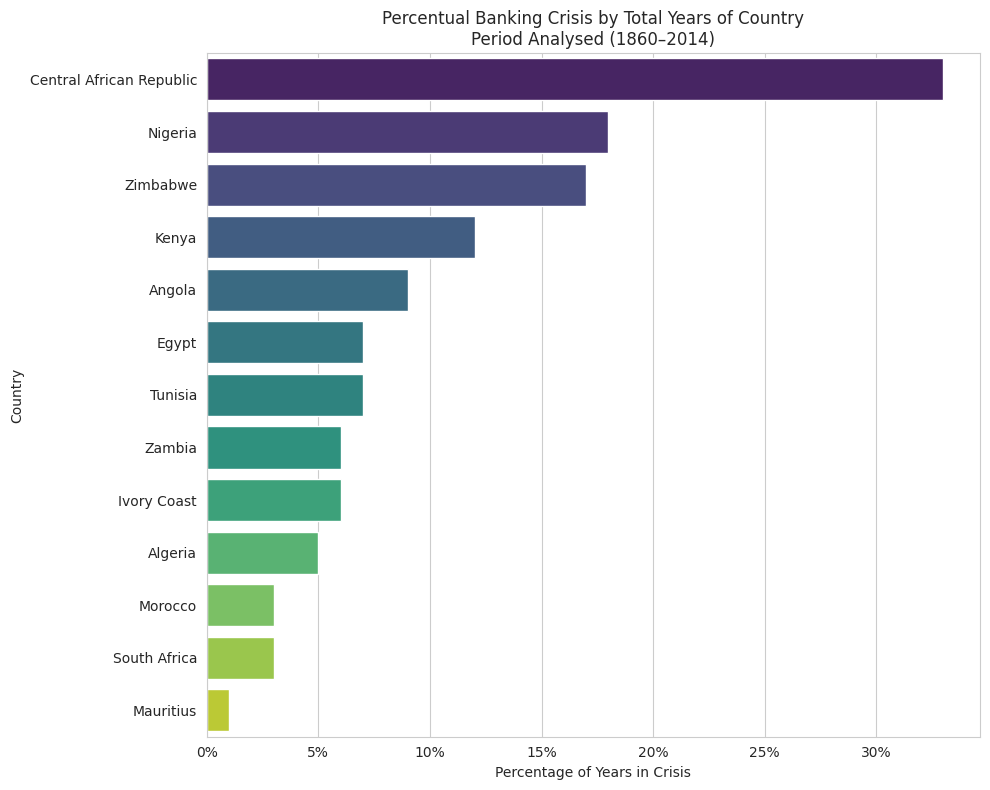

In [ ]:
# Count years with and without banking crisis by country
crisis_counts = (
    df
    .groupby(['country', 'banking_crisis'])
    .size()
    .unstack(fill_value=0)
    .rename(columns={'crisis': 'crisis', 'no_crisis': 'no_crisis'})
)

# Calculate percentage of years in crisis
crisis_counts['percentual_banking_crisis'] = (
    crisis_counts[1] / (crisis_counts[0] + crisis_counts[1])
).round(2)

# Reset index for plotting
crisis_counts = crisis_counts.reset_index()

# Sort by percentage
crisis_counts_sorted = crisis_counts.sort_values(by='percentual_banking_crisis', ascending=False)

# Plot
plt.figure(figsize=(10, 8))
sns.barplot(
    x='percentual_banking_crisis',
    y='country',
    data=crisis_counts_sorted,
    palette='viridis'
)

plt.xlabel('Percentage of Years in Crisis')
plt.ylabel('Country')
plt.title('Percentual Banking Crisis by Total Years of Country\nPeriod Analysed (1860–2014)')
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x*100)}%'))
plt.tight_layout()
plt.show()

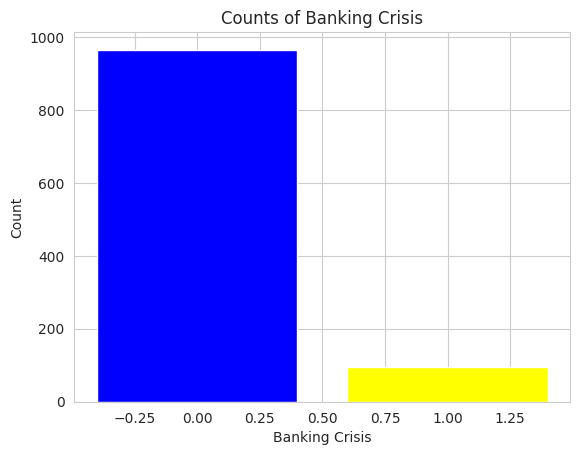

In [ ]:
counts = df['banking_crisis'].value_counts().sort_index()

plt.bar(counts.index, counts.values, color = ['blue', 'yellow'])
plt.title('Counts of Banking Crisis')
plt.xlabel('Banking Crisis')
plt.ylabel('Count')
plt.show()

In [ ]:
## percentage of crisis & no crisis for banking crisis
cnt_no_crisis = sum(df['banking_crisis']==0)
cnt_crisis = sum(df['banking_crisis']==1)
pct_of_no_crisis = cnt_no_crisis/(cnt_no_crisis+cnt_crisis)
print("percentage of no crisis is", pct_of_no_crisis*100)
pct_of_crisis = cnt_crisis/(cnt_no_crisis+cnt_crisis)
print("percentage of crisis", pct_of_crisis*100)

percentage of no crisis is 91.123701605288
percentage of crisis 8.876298394711993


We decided not to use SMOTE in this project because the data is time-dependent. Since SMOTE creates synthetic samples randomly, it could mess up the chronological order of the data, which is really important in time series forecasting. This might lead to data leakage or unrealistic patterns. Instead, we will use class weighting in our classification model to give more importance to the minority class without disturbing the temporal structure of the data.

# 2. Data Preprocessing

In [ ]:
df

,case,cc3,country,year,systemic_crisis,exch_usd,domestic_debt_in_default,sovereign_external_debt_default,gdp_weighted_default,inflation_annual_cpi,independence,currency_crises,inflation_crises,banking_crisis
0,1,DZA,Algeria,1870-01-01,1,0.052264,0,0,0.0,3.441456,0,0,0,1
1,1,DZA,Algeria,1871-01-01,0,0.052798,0,0,0.0,14.149140,0,0,0,0
2,1,DZA,Algeria,1872-01-01,0,0.052274,0,0,0.0,-3.718593,0,0,0,0
3,1,DZA,Algeria,1873-01-01,0,0.051680,0,0,0.0,11.203897,0,0,0,0
4,1,DZA,Algeria,1874-01-01,0,0.051308,0,0,0.0,-3.848561,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1054,70,ZWE,Zimbabwe,2009-01-01,1,354.800000,1,1,0.0,-7.670000,1,1,0,1
1055,70,ZWE,Zimbabwe,2010-01-01,0,378.200000,1,1,0.0,3.217000,1,0,0,0
1056,70,ZWE,Zimbabwe,2011-01-01,0,361.900000,1,1,0.0,4.920000,1,0,0,0
1057,70,ZWE,Zimbabwe,2012-01-01,0,361.900000,1,1,0.0,3.720000,1,0,0,0


1. Remove "case", "cc3", "country"

2. Remove "domestic_debt_in_default"

In [ ]:
df['domestic_debt_in_default'].value_counts()

,count
domestic_debt_in_default,
0,1017
1,42


3. Remove 'gdp_weighted_default'

In [ ]:
df['gdp_weighted_default'].value_counts()

,count
gdp_weighted_default,
0.00,1029
0.06,7
0.23,6
0.40,6
0.13,6
0.36,5


4. Create lagged variables:
*	banking_crisis_ag1 -- Whether there was a banking crisis in the previous year
* currency_crises_lag1 -- Whether there was a currency crisis in the previous year
* inflation_crises_lag1 -- Whether there was an inflation crisis in the previous year
* inflation_annual_cpi_lag1 -- Annual CPI inflation value from the previous year

In [ ]:
# Ensure data is sorted by country and year
df = df.sort_values(by=['country', 'year']).copy()

# Define variables to lag
lag_vars = [
    'banking_crisis',
    'currency_crises',
    'inflation_crises',
    'inflation_annual_cpi'
]

# Create lagged features
for var in lag_vars:
    df[f'{var}_lag1'] = df.groupby('country')[var].shift(1)

df.dropna(inplace=True)

In [ ]:
df = df.drop(columns=["case", "cc3", "domestic_debt_in_default", "gdp_weighted_default"])

In [ ]:
df.head()

,country,year,systemic_crisis,exch_usd,sovereign_external_debt_default,inflation_annual_cpi,independence,currency_crises,inflation_crises,banking_crisis,banking_crisis_lag1,currency_crises_lag1,inflation_crises_lag1,inflation_annual_cpi_lag1
1,Algeria,1871-01-01,0,0.052798,0,14.149140,0,0,0,0,1.0,0.0,0.0,3.441456
2,Algeria,1872-01-01,0,0.052274,0,-3.718593,0,0,0,0,0.0,0.0,0.0,14.149140
3,Algeria,1873-01-01,0,0.051680,0,11.203897,0,0,0,0,0.0,0.0,0.0,-3.718593
4,Algeria,1874-01-01,0,0.051308,0,-3.848561,0,0,0,0,0.0,0.0,0.0,11.203897
5,Algeria,1875-01-01,0,0.051546,0,-20.924178,0,0,0,0,0.0,0.0,0.0,-3.848561


5. Divide into train/test

In [ ]:
# Define how much of the data should go to the test set (e.g. last 20%)
test_frac = 0.2

# Initialize empty lists
train_parts = []
test_parts = []

# Group by country and split each group
for country, group in df.groupby('country'):
    group_sorted = group.sort_values('year')  # ensure time order

    # Index to split at
    split_idx = int(len(group_sorted) * (1 - test_frac))

    train_parts.append(group_sorted.iloc[:split_idx])
    test_parts.append(group_sorted.iloc[split_idx:])

# Concatenate into final train and test sets
train_df = pd.concat(train_parts)
test_df = pd.concat(test_parts)

# Reset index
train_df = train_df.reset_index(drop=True)
test_df = test_df.reset_index(drop=True)

In [ ]:
train_df["country"].value_counts()

,count
country,
Egypt,123
South Africa,90
Zimbabwe,71
Algeria,67
Angola,60
Morocco,59
Tunisia,59
Zambia,56
Mauritius,53


In [ ]:
test_df["country"].value_counts()

,count
country,
Egypt,31
South Africa,23
Zimbabwe,18
Algeria,17
Angola,16
Zambia,15
Tunisia,15
Morocco,15
Kenya,14


In [ ]:
# Drop country and year
train_df = train_df.drop(columns=['country', 'year'])
test_df = test_df.drop(columns=['country', 'year'])

In [ ]:
train_df.head()

,systemic_crisis,exch_usd,sovereign_external_debt_default,inflation_annual_cpi,independence,currency_crises,inflation_crises,banking_crisis,banking_crisis_lag1,currency_crises_lag1,inflation_crises_lag1,inflation_annual_cpi_lag1
0,0,0.052798,0,14.149140,0,0,0,0,1.0,0.0,0.0,3.441456
1,0,0.052274,0,-3.718593,0,0,0,0,0.0,0.0,0.0,14.149140
2,0,0.051680,0,11.203897,0,0,0,0,0.0,0.0,0.0,-3.718593
3,0,0.051308,0,-3.848561,0,0,0,0,0.0,0.0,0.0,11.203897
4,0,0.051546,0,-20.924178,0,0,0,0,0.0,0.0,0.0,-3.848561


In [ ]:
train_df.shape

(831, 12)

In [ ]:
test_df.head()

,systemic_crisis,exch_usd,sovereign_external_debt_default,inflation_annual_cpi,independence,currency_crises,inflation_crises,banking_crisis,banking_crisis_lag1,currency_crises_lag1,inflation_crises_lag1,inflation_annual_cpi_lag1
0,0,60.3531,0,4.95,1,0,0,0,0.0,0.0,0.0,5.70
1,0,69.3143,0,2.60,1,0,0,0,0.0,0.0,0.0,4.95
2,0,75.3428,0,0.30,1,0,0,0,0.0,0.0,0.0,2.60
3,0,77.8196,0,4.20,1,0,0,0,0.0,0.0,0.0,0.30
4,0,79.7234,0,1.43,1,0,0,0,0.0,0.0,0.0,4.20


In [ ]:
test_df.shape

(215, 12)

In [ ]:
X_train = train_df.drop(columns=['banking_crisis'])
y_train = train_df['banking_crisis']

X_test = test_df.drop(columns=['banking_crisis'])
y_test = test_df['banking_crisis']

# 3. Modeling

In [ ]:
# def evaluate_model(model, X_test, y_test):
#     y_pred = model.predict(X_test)
#     y_proba = model.predict_proba(X_test)[:, 1]

#     print("Classification Report:")
#     print(classification_report(y_test, y_pred, digits=4))

#     print("Confusion Matrix:")
#     print(confusion_matrix(y_test, y_pred))

#     print(f"Accuracy:      {accuracy_score(y_test, y_pred):.4f}")
#     print(f"F1 Score:      {f1_score(y_test, y_pred):.4f}")
#     print(f"ROC-AUC Score: {roc_auc_score(y_test, y_proba):.4f}")

#     fpr, tpr, _ = roc_curve(y_test, y_proba)
#     plt.figure(figsize=(8, 6))
#     plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc_score(y_test, y_proba):.4f})')
#     plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
#     plt.xlabel('False Positive Rate')
#     plt.ylabel('True Positive Rate')
#     plt.title('ROC-AUC Curve')
#     plt.legend()
#     plt.show()

In [ ]:
def evaluate_model(model, X_test, y_test, model_name='Model'):
    y_pred = model.predict(X_test)

    # Handle probability estimation (not available in some classifiers like SVC with default settings)
    if hasattr(model, "predict_proba"):
        y_proba = model.predict_proba(X_test)[:, 1]
    elif hasattr(model, "decision_function"):
        y_proba = model.decision_function(X_test)
    else:
        y_proba = None

    print(f"\n=== Evaluation for {model_name} ===")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred, digits=4))

    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))

    print(f"Accuracy:      {accuracy_score(y_test, y_pred):.4f}")
    print(f"F1 Score:      {f1_score(y_test, y_pred):.4f}")
    print(f"Recall:        {recall_score(y_test, y_pred):.4f}")

    if y_proba is not None:
        roc_auc = roc_auc_score(y_test, y_proba)
        print(f"ROC-AUC Score: {roc_auc:.4f}")

        # Plot ROC curve
        fpr, tpr, _ = roc_curve(y_test, y_proba)
        plt.figure(figsize=(8, 6))
        plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.4f})')
        plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'ROC-AUC Curve: {model_name}')
        plt.legend()
        plt.show()
    else:
        print("ROC-AUC Score and Curve cannot be computed (no probability estimates).")

3.1 Logistic Regression

In [ ]:
# Normalize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


=== Evaluation for Logistic Regression ===

Classification Report:
              precision    recall  f1-score   support

           0     0.9840    0.9788    0.9814       189
           1     0.8519    0.8846    0.8679        26

    accuracy                         0.9674       215
   macro avg     0.9179    0.9317    0.9247       215
weighted avg     0.9681    0.9674    0.9677       215

Confusion Matrix:
[[185   4]
 [  3  23]]
Accuracy:      0.9674
F1 Score:      0.8679
Recall:        0.8846
ROC-AUC Score: 0.9904


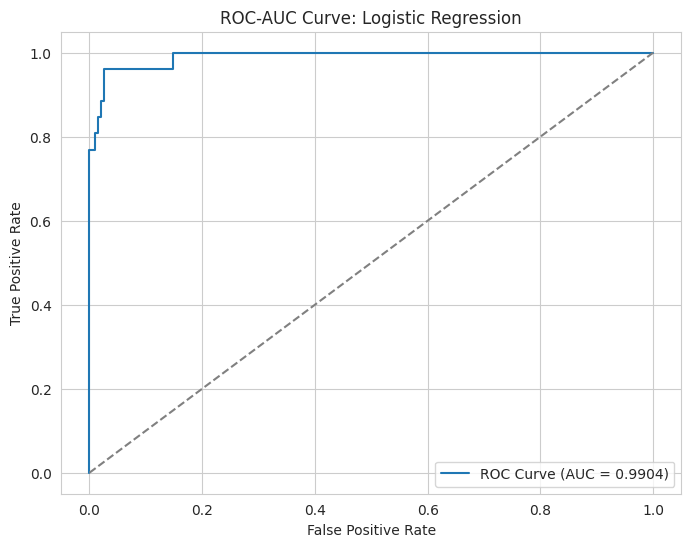

In [ ]:
lr = LogisticRegression(class_weight='balanced', max_iter=1000, solver='liblinear')

# Recursive Feature Elimination (RFE)
rfe = RFE(estimator=lr, n_features_to_select=8)
rfe.fit(X_train_scaled, y_train)

# Reduced feature sets
X_train_rfe = rfe.transform(X_train_scaled)
X_test_rfe = rfe.transform(X_test_scaled)

# Fit logistic regression
lr.fit(X_train_rfe, y_train)

evaluate_model(lr, X_test_rfe, y_test, model_name="Logistic Regression")

In [ ]:
# Get names of selected features
selected_features = X_train.columns[rfe.get_support()]
coefficients = lr.coef_.flatten()

# Create and display DataFrame
feature_importance_rfe = pd.DataFrame({
    'Feature': selected_features,
    'Coefficient': coefficients
}).sort_values(by='Coefficient', key=abs, ascending=False)

print("=== Top Features Selected by RFE + Logistic Regression ===")
feature_importance_rfe = feature_importance_rfe.reset_index(drop=True)
display(feature_importance_rfe)

=== Top Features Selected by RFE + Logistic Regression ===


,Feature,Coefficient
0,inflation_annual_cpi,1.846900
1,systemic_crisis,1.540841
2,independence,1.119906
3,inflation_annual_cpi_lag1,0.876748
4,banking_crisis_lag1,0.624012
5,currency_crises,-0.556235
6,currency_crises_lag1,0.356921
7,inflation_crises_lag1,0.293773


3.2 Logistic Regression with ElasticNet


=== Evaluation for Logistic Regression ===

Classification Report:
              precision    recall  f1-score   support

           0     0.9787    0.9735    0.9761       189
           1     0.8148    0.8462    0.8302        26

    accuracy                         0.9581       215
   macro avg     0.8968    0.9098    0.9032       215
weighted avg     0.9589    0.9581    0.9585       215

Confusion Matrix:
[[184   5]
 [  4  22]]
Accuracy:      0.9581
F1 Score:      0.8302
Recall:        0.8462
ROC-AUC Score: 0.9878


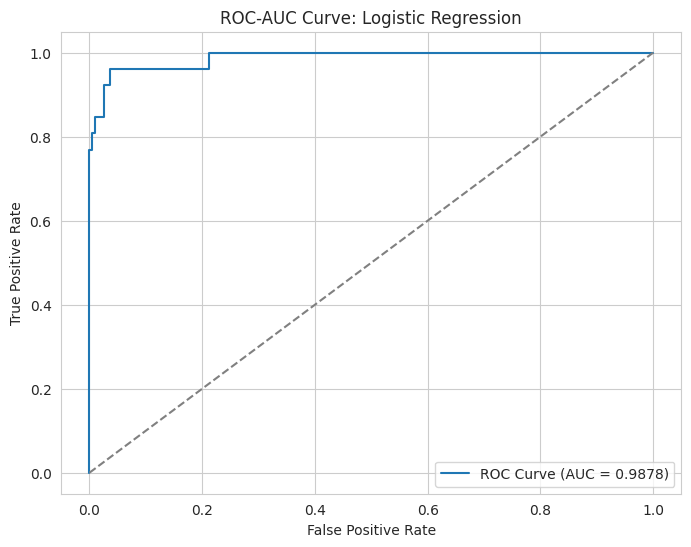

In [ ]:
elasticnet = LogisticRegression(
    penalty='elasticnet',
    solver='saga',
    l1_ratio=0.5,
    max_iter=5000,
    class_weight='balanced',
    random_state=42
)

elasticnet.fit(X_train_scaled, y_train)

evaluate_model(elasticnet, X_test_scaled, y_test, model_name="Logistic Regression")

In [ ]:
# Get coefficients and feature names
elasticnet_coeffs = elasticnet.coef_.flatten()

# Create and display DataFrame
feature_importance_elasticnet = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': elasticnet_coeffs
}).sort_values(by='Coefficient', key=abs, ascending=False)

print("=== Top Features from ElasticNet Logistic Regression ===")
feature_importance_elasticnet = feature_importance_elasticnet.reset_index(drop=True)
display(feature_importance_elasticnet)

=== Top Features from ElasticNet Logistic Regression ===


,Feature,Coefficient
0,inflation_annual_cpi,1.792010
1,systemic_crisis,1.612372
2,independence,1.412279
3,currency_crises,-0.671726
4,banking_crisis_lag1,0.661761
5,inflation_annual_cpi_lag1,0.438514
6,currency_crises_lag1,0.317211
7,exch_usd,-0.287658
8,inflation_crises_lag1,0.215491
9,inflation_crises,0.199108


3.3 SVC


=== Evaluation for SVC ===

Classification Report:
              precision    recall  f1-score   support

           0     0.9688    0.9841    0.9764       189
           1     0.8696    0.7692    0.8163        26

    accuracy                         0.9581       215
   macro avg     0.9192    0.8767    0.8964       215
weighted avg     0.9568    0.9581    0.9570       215

Confusion Matrix:
[[186   3]
 [  6  20]]
Accuracy:      0.9581
F1 Score:      0.8163
Recall:        0.7692
ROC-AUC Score: 0.9556


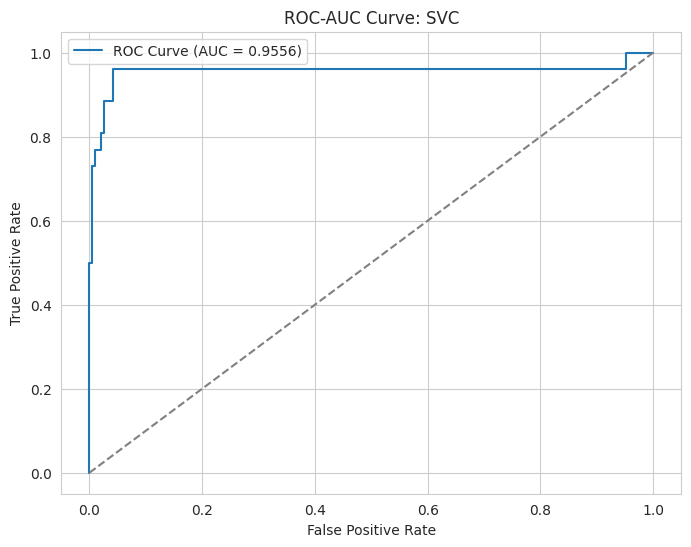

In [ ]:
svc = SVC(kernel='linear', class_weight='balanced', max_iter=10000)
svc.fit(X_train_rfe, y_train)
evaluate_model(svc, X_test_rfe, y_test, model_name="SVC")

3.4 K-NN

In [ ]:
# 2. Define parameter grid for K
param_grid = {'n_neighbors': list(range(1, 31))}  # Try k = 1 to 30

# 3. Grid Search for best k
knn = KNeighborsClassifier()
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)

# 4. Best model
best_k = grid_search.best_params_['n_neighbors']
best_knn = grid_search.best_estimator_
print(f"✅ Best k found: {best_k}")

✅ Best k found: 9


🔵 KNN Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       189
           1       1.00      0.77      0.87        26

    accuracy                           0.97       215
   macro avg       0.98      0.88      0.93       215
weighted avg       0.97      0.97      0.97       215


=== Evaluation for Model ===

Classification Report:
              precision    recall  f1-score   support

           0     0.9692    1.0000    0.9844       189
           1     1.0000    0.7692    0.8696        26

    accuracy                         0.9721       215
   macro avg     0.9846    0.8846    0.9270       215
weighted avg     0.9730    0.9721    0.9705       215

Confusion Matrix:
[[189   0]
 [  6  20]]
Accuracy:      0.9721
F1 Score:      0.8696
Recall:        0.7692
ROC-AUC Score: 0.9449


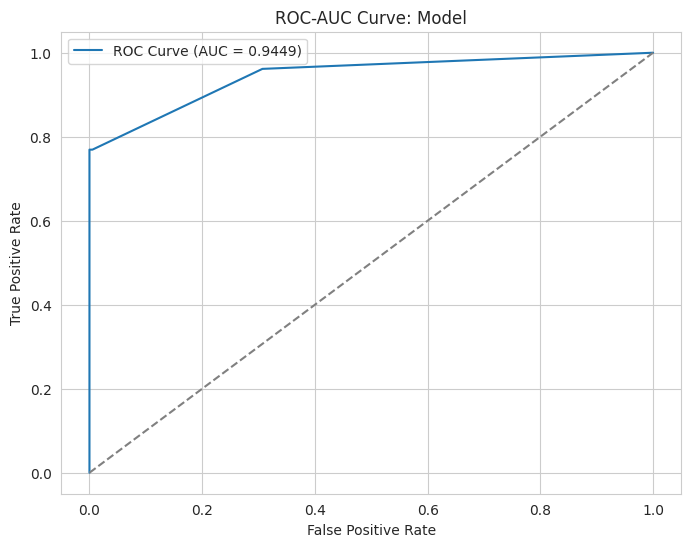

In [ ]:
y_pred = best_knn.predict(X_test_scaled)
print("🔵 KNN Classification Report:")
print(classification_report(y_test, y_pred))

evaluate_model(best_knn, X_test_scaled, y_test)

3.5 Gradient Boosting

In [ ]:
# Train & Oprimize using Cross_Validation
param_grid_gbm_ogn = {
    'n_estimators': [100, 200, 300],
    "max_depth": range(1,5),
    "learning_rate": [0.01, 0.1, 1]
}

tscv = TimeSeriesSplit(n_splits=5, test_size = 1)
sample_weights = compute_sample_weight('balanced', y_train)

# Recursive Feature Elimination (RFE)
gbm = GradientBoostingClassifier(random_state=81)
rfe_gb = RFE(estimator=gbm, n_features_to_select=8)
rfe_gb.fit(X_train, y_train)

# Reduced feature sets
X_train_rfe_gb = rfe_gb.transform(X_train)
X_test_rfe_gb = rfe_gb.transform(X_test)

grid_search_gbm = GridSearchCV(GradientBoostingClassifier(random_state=81), param_grid_gbm_ogn, cv=tscv, scoring='accuracy')
grid_search_gbm.fit(X_train_rfe_gb, y_train, sample_weight = sample_weights)

GridSearchCV(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=5, test_size=1),
             estimator=GradientBoostingClassifier(random_state=81),
             param_grid={'learning_rate': [0.01, 0.1, 1],
                         'max_depth': range(1, 5),
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy')

In [ ]:
# GB: Grid_Search_Results
print(grid_search_gbm.best_params_)
print(grid_search_gbm.best_estimator_)

{'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 100}
GradientBoostingClassifier(learning_rate=0.01, max_depth=1, random_state=81)



=== Evaluation for Gradient Boosting ===

Classification Report:
              precision    recall  f1-score   support

           0     0.9692    1.0000    0.9844       189
           1     1.0000    0.7692    0.8696        26

    accuracy                         0.9721       215
   macro avg     0.9846    0.8846    0.9270       215
weighted avg     0.9730    0.9721    0.9705       215

Confusion Matrix:
[[189   0]
 [  6  20]]
Accuracy:      0.9721
F1 Score:      0.8696
Recall:        0.7692
ROC-AUC Score: 0.9783


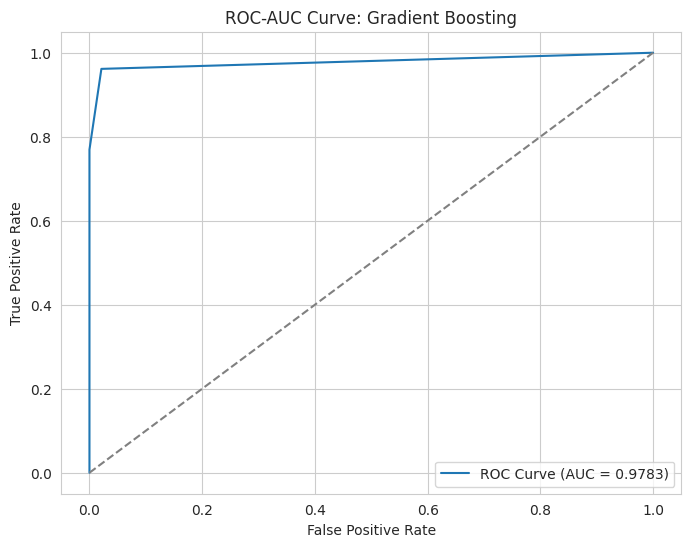

In [ ]:
evaluate_model(grid_search_gbm.best_estimator_, X_test_rfe_gb, y_test, model_name = "Gradient Boosting")

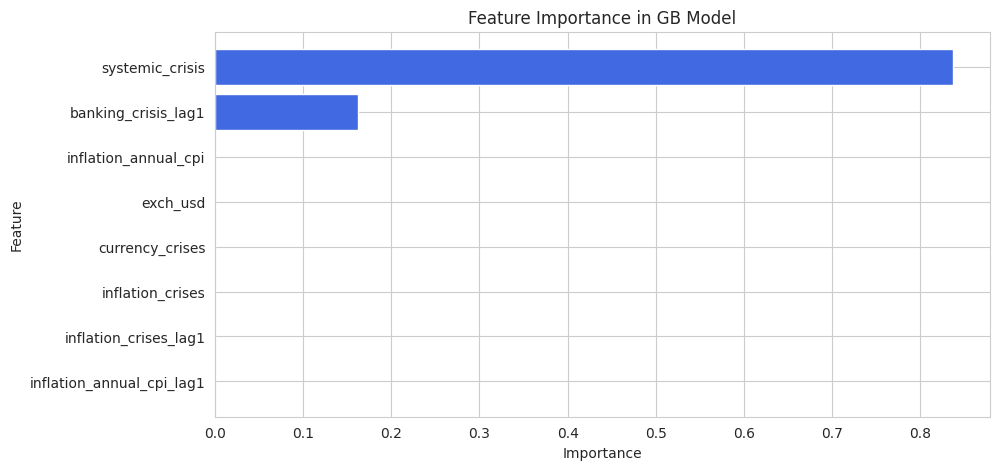

In [ ]:
# Feature importance
features = X_train.columns[rfe_gb.support_]
importances = grid_search_gbm.best_estimator_.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by="Importance", ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 5))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='royalblue')
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Feature Importance in GB Model")
plt.gca().invert_yaxis()
plt.show()

In [ ]:
X_train.columns[rfe_gb.support_]

Index(['systemic_crisis', 'exch_usd', 'inflation_annual_cpi',
       'currency_crises', 'inflation_crises', 'banking_crisis_lag1',
       'inflation_crises_lag1', 'inflation_annual_cpi_lag1'],
      dtype='object')

In [ ]:
features = X_train.columns[rfe_gb.support_]
features

Index(['systemic_crisis', 'exch_usd', 'inflation_annual_cpi',
       'currency_crises', 'inflation_crises', 'banking_crisis_lag1',
       'inflation_crises_lag1', 'inflation_annual_cpi_lag1'],
      dtype='object')

3.6 Random Forest

In [ ]:
# Train & Oprimize using Cross_Validation
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    "max_depth": range(5, 10),
    'class_weight': ['balanced']
}

tscv = TimeSeriesSplit(n_splits=5, test_size = 1)

# Recursive Feature Elimination (RFE)
rf = RandomForestClassifier(random_state=42)
rfe_rf = RFE(estimator=rf, n_features_to_select=8)
rfe_rf.fit(X_train, y_train)

# Reduced feature sets
X_train_rfe_rf = rfe_rf.transform(X_train)
X_test_rfe_rf = rfe_rf.transform(X_test)

grid_search_rf = GridSearchCV(RandomForestClassifier(random_state=43), param_grid_rf, cv=tscv, scoring='accuracy')
grid_search_rf.fit(X_train_rfe_rf, y_train)

GridSearchCV(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=5, test_size=1),
             estimator=RandomForestClassifier(random_state=43),
             param_grid={'class_weight': ['balanced'],
                         'max_depth': range(5, 10),
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy')

In [ ]:
# RF: Grid_Search_Results
print(grid_search_rf.best_params_)
print(grid_search_rf.best_estimator_)

{'class_weight': 'balanced', 'max_depth': 5, 'n_estimators': 100}
RandomForestClassifier(class_weight='balanced', max_depth=5, random_state=43)



=== Evaluation for Random Forest ===

Classification Report:
              precision    recall  f1-score   support

           0     0.9689    0.9894    0.9791       189
           1     0.9091    0.7692    0.8333        26

    accuracy                         0.9628       215
   macro avg     0.9390    0.8793    0.9062       215
weighted avg     0.9617    0.9628    0.9614       215

Confusion Matrix:
[[187   2]
 [  6  20]]
Accuracy:      0.9628
F1 Score:      0.8333
Recall:        0.7692
ROC-AUC Score: 0.9908


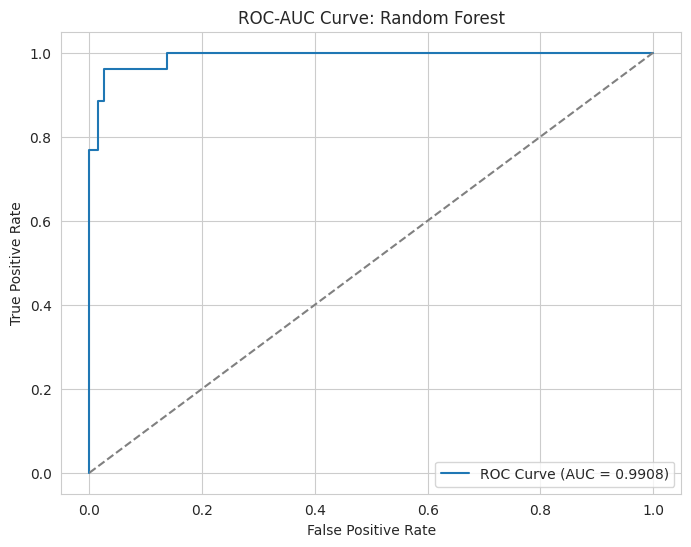

In [ ]:
evaluate_model(grid_search_rf.best_estimator_, X_test_rfe_rf, y_test, model_name = "Random Forest")

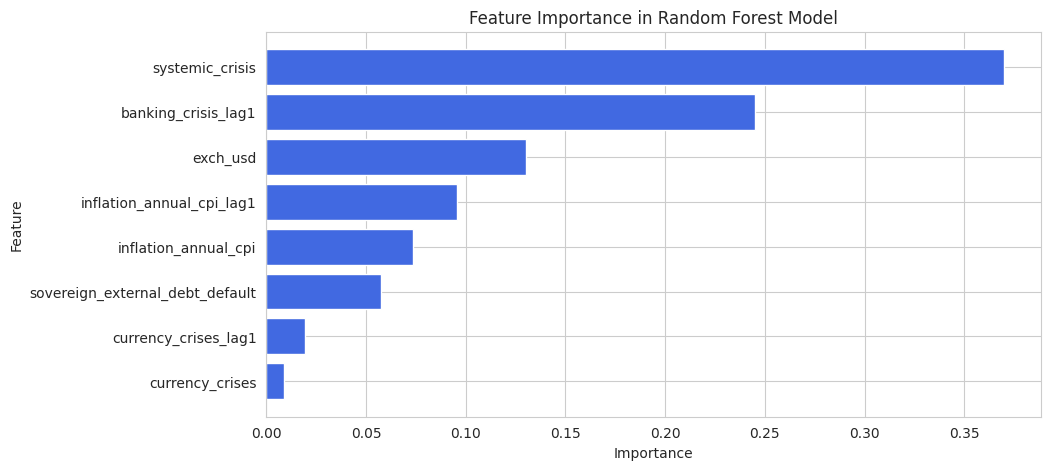

In [ ]:
# Feature importance
features = X_train.columns[rfe_rf.support_]
importances = grid_search_rf.best_estimator_.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by="Importance", ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 5))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='royalblue')
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Feature Importance in Random Forest Model")
plt.gca().invert_yaxis()
plt.show()

In [ ]:
X_train.columns[rfe_rf.support_]

Index(['systemic_crisis', 'exch_usd', 'sovereign_external_debt_default',
       'inflation_annual_cpi', 'currency_crises', 'banking_crisis_lag1',
       'currency_crises_lag1', 'inflation_annual_cpi_lag1'],
      dtype='object')

In [ ]:
features = X_train.columns[rfe_rf.support_]
features

Index(['systemic_crisis', 'exch_usd', 'sovereign_external_debt_default',
       'inflation_annual_cpi', 'currency_crises', 'banking_crisis_lag1',
       'currency_crises_lag1', 'inflation_annual_cpi_lag1'],
      dtype='object')